Problem: Friedman-1 regression

__\<INCLUDE FORMULA\>__

Description: Page 207 DEAP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# used libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

sys.path.append(os.path.join('..', '..'))
import pywinEA2 as pea

In [3]:
# PSO algorithm parameters
POPULATION_SIZE = 100
MAX_ITERATIONS = 1000
PSO_UPDATE_KW = dict(
    inertia=0.01,
    acc_const1=0.05,
    clip_values=(0, 1)
)

# dataset creation parameters
N_SAMPLES = 200
N_FEATURES = 90
NOISE = 0.5

# misc
SEED = 1997


In [4]:
def getDataset() -> pd.DataFrame:
    """ Create the testing dataset """
    X, y = datasets.make_friedman1(
        n_samples=N_SAMPLES,
        n_features=N_FEATURES,
        noise=NOISE,
        random_state=SEED)
    
    X = pd.DataFrame(X, columns=['feat_{}'.format(f) for f in range(X.shape[1])])
    y = pd.DataFrame(y, columns=['target'])
    data = pd.concat([X, y], axis=1)
    
    return data

In [5]:
data = getDataset()
data.head(5)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,target
0,0.771148,0.074757,0.526310,0.975088,0.992226,0.465135,0.611135,0.569463,0.667719,0.786780,...,0.739056,0.189999,0.354658,0.213068,0.424554,0.320884,0.967451,0.063337,0.225850,16.864643
1,0.944677,0.166228,0.077853,0.717844,0.920020,0.615669,0.299287,0.847137,0.508283,0.131813,...,0.266088,0.491251,0.377104,0.265917,0.857921,0.914392,0.771561,0.187760,0.384997,20.389099
2,0.217790,0.972564,0.403189,0.872092,0.682622,0.445948,0.288469,0.761892,0.621428,0.208704,...,0.212825,0.341531,0.144842,0.435395,0.022645,0.667047,0.036734,0.655309,0.418235,18.261778
3,0.422399,0.438913,0.771213,0.502754,0.824081,0.200905,0.374775,0.723844,0.835281,0.951988,...,0.629061,0.112162,0.667163,0.303717,0.528023,0.122898,0.449646,0.511640,0.581908,15.298821
4,0.341653,0.076352,0.535166,0.679331,0.747861,0.665039,0.877723,0.025591,0.277263,0.648561,...,0.053892,0.553951,0.727013,0.407122,0.062515,0.518457,0.470395,0.892971,0.454677,11.989297


In [6]:
pea.USE_NOTEBOOK_ENVIRONMENT = False

# create the model
model = SVR()
# create fitness function
fitness_function = pea.fitness.FeatureSelectionFitness(
    model=model,
    score='mean_squared_error',
    X=data[[c for c in data.columns if c.startswith('feat')]].values,
    y=data['target'],
    X_fixed=None,
    cv=None,
    n_jobs=1
)


particles = pea.pso.vlpso(
    population_size=200,
    num_population_div=20,
    fitness_function=fitness_function,
    max_iterations=500,
    beta=50,
    alpha=50,
    rank_function='pearsonCorrImportance',
    particle_update_kw={'inertia': 0.1, 'acc_const1': 0.1},
    pso_evaluation_kw=dict(invert_objective=True, n_jobs=15),
    report=pea.pso.PSOReport(['min', 'max', 'mean', 'std'])
)
#report , feature_order = particles
#particles = report.particles

100%|█████████████████████████████████████████████████████████████| 500/500 [01:53<00:00,  4.40it/s]


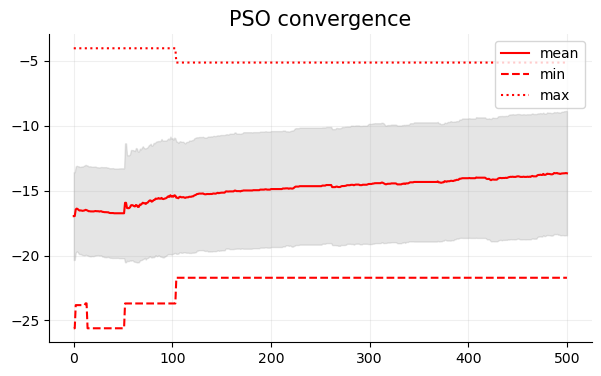

In [7]:
particles[0].displayConvergence()

In [9]:
particles[0].particles[0].gbest

array([0.77437237, 0.75528623, 0.76648494, 0.8843877 ])

In [13]:
particles[0].particles[199].gbest

array([0.77437237, 0.75528623, 0.76648494, 0.8843877 ])

In [14]:
particles[0].particles[199].pbest

array([0.34658754, 0.60396683, 0.50736444])

In [15]:
particles[0].particles[0].pbest

array([0.85317402])

In [10]:
particles[1]

['feat_3',
 'feat_0',
 'feat_1',
 'feat_4',
 'feat_83',
 'feat_67',
 'feat_6',
 'feat_36',
 'feat_63',
 'feat_32',
 'feat_82',
 'feat_18',
 'feat_68',
 'feat_59',
 'feat_17',
 'feat_8',
 'feat_52',
 'feat_47',
 'feat_25',
 'feat_15',
 'feat_42',
 'feat_71',
 'feat_84',
 'feat_55',
 'feat_22',
 'feat_89',
 'feat_23',
 'feat_39',
 'feat_45',
 'feat_77',
 'feat_30',
 'feat_11',
 'feat_56',
 'feat_88',
 'feat_14',
 'feat_54',
 'feat_79',
 'feat_38',
 'feat_44',
 'feat_70',
 'feat_50',
 'feat_37',
 'feat_33',
 'feat_87',
 'feat_62',
 'feat_80',
 'feat_40',
 'feat_76',
 'feat_49',
 'feat_24',
 'feat_51',
 'feat_26',
 'feat_35',
 'feat_66',
 'feat_34',
 'feat_64',
 'feat_69',
 'feat_7',
 'feat_29',
 'feat_20',
 'feat_21',
 'feat_43',
 'feat_53',
 'feat_2',
 'feat_61',
 'feat_46',
 'feat_58',
 'feat_48',
 'feat_86',
 'feat_16',
 'feat_28',
 'feat_81',
 'feat_19',
 'feat_13',
 'feat_75',
 'feat_5',
 'feat_65',
 'feat_12',
 'feat_57',
 'feat_72',
 'feat_10',
 'feat_85',
 'feat_73',
 'feat_41',
 

In [8]:
assert False

AssertionError: 

In [ ]:
pea.pso.population.lengthChanging(particles)

In [ ]:
from collections import defaultdict
fitness_per_division = defaultdict(list)
particles_by_division = defaultdict(list)
for p in particles:
    fitness_per_division[len(p)].append(p.best_fitness_value)
    particles_by_division[len(p)].append(p)
fitness_per_division = {k: np.mean(v) for k, v in fitness_per_division.items()}

# get the number of divisions of the current swarm
nbr_div = len(fitness_per_division)
# get the max length of particles in the current swarm
max_len = max(fitness_per_division.keys())
# particles' length of the best division
best_len = max(fitness_per_division, key=lambda v: fitness_per_division[v])
# sort the different divisions
divisions = sorted(list(fitness_per_division.keys()))

In [ ]:
fitness_per_division

In [ ]:
nbr_div, max_len, best_len